# Proyecto 1:  Red neuronal perceptrón multicapa para resolver la clasificación de imágenes por forma y por color.
Alumna: Ovando Becerril Ericka Deyanira

A continuación se presenta el código que se utilizó para seccionar las imagenes se utilizó cv2 y findContours.

Se declaran las librerias:

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as img
from PIL import Image,ImageOps
from sklearn.metrics import accuracy_score


In [2]:
image= cv2.imread('fig.jpg')
#b, g, r = cv2.split(image)
#print('BGR', b, g, r)

La imagen original a procesar para el entrenamiento: 

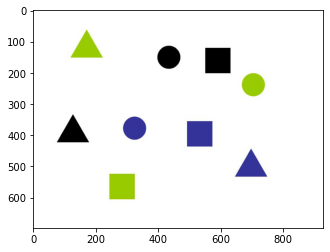

In [3]:
plt.imshow(img.imread('fig.jpg'))
plt.show()

In [4]:
imagen_RGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #pasamos a RGB para poder deetectar las figuras
cv2.imwrite('RGB.jpg', imagen_RGB) #se guarda un nuevo archivo

True

La imagen original convertida a RGB:

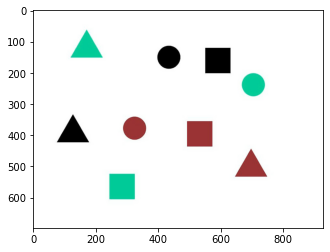

In [8]:
plt.imshow(img.imread('RGB.jpg'))
plt.show()

Se recorta la imagen original segun las figuras de interes para entrenar el modelo ML

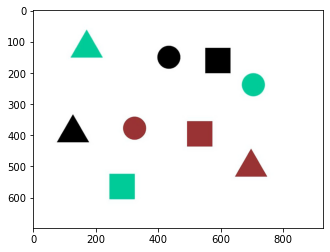

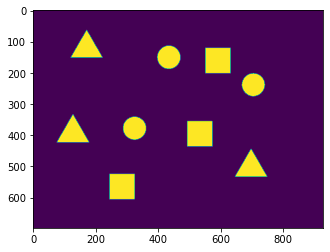

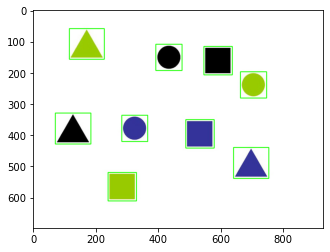

In [5]:
#leer archivo original, OpenCV invierte los canales B y R
imagen = cv2.imread('RGB.jpg')
#realizar copia 
copia= imagen.copy()
plt.imshow(image)
plt.show()

#pasar a escala de grises 
gray = cv2.cvtColor(copia, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 300, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)[1]
plt.imshow(thresh)
plt.show()
#Se recuperan los contornos de las figuras geometricas, se recortan y se guardan en un archivo png
ROI_number = 0
cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(copia, (x-5, y-5), (x + w+5, y + h+5), (36,255,12), 2)
    ROI = image[y-5:y+h+5, x-5:x+w+5]
    cv2.imwrite('ROI_{}.png'.format(ROI_number), ROI)
    ROI_number += 1

plt.imshow(copia)
plt.show()

Las imagenes que obtenemos para el entrenamiento:

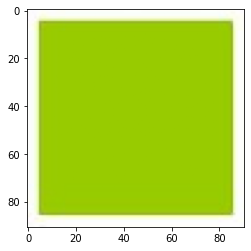

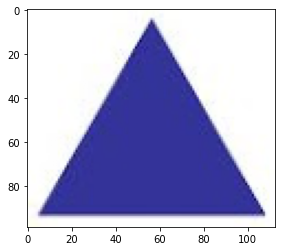

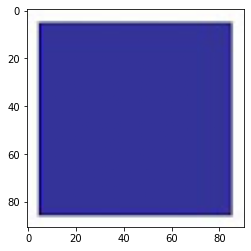

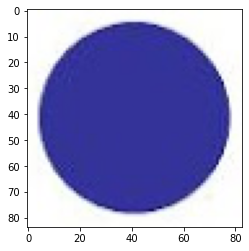

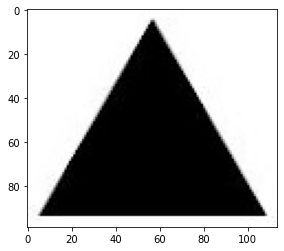

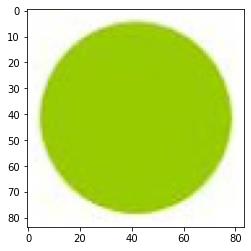

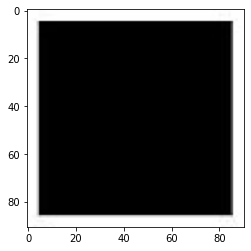

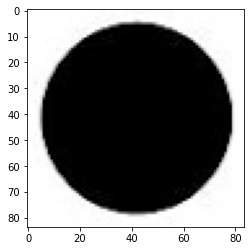

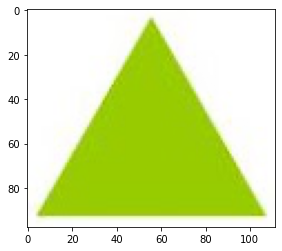

In [6]:
ROI_number=0
for c in cnts:
    plt.imshow(img.imread('ROI_{}.png'.format(ROI_number)))
    plt.show()
    ROI_number += 1

# Para los datos de prueba:

In [19]:
photo= cv2.imread('foto.jpg')

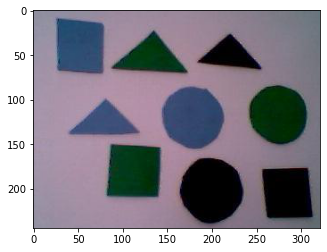

In [20]:
plt.imshow(img.imread('foto.jpg'))
plt.show()

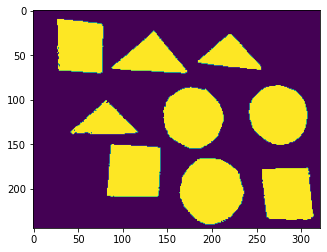

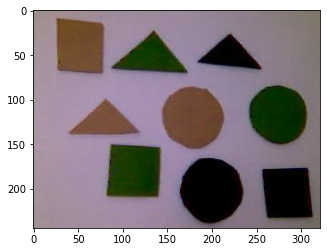

In [21]:
#leer archivo original, OpenCV invierte los canales B y R
#realizar copia 
copia_f= photo.copy()
#pasar a escala de grises 
gray = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 300, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)[1]
plt.imshow(thresh)
plt.show()
#Se recuperan los contornos de las figuras geometricas, se recortan y se guardan en un archivo png
TS_number = 0
cont = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cont = cont[0] if len(cont) == 2 else cont[1]
for c in cont:
    x,y,w,h = cv2.boundingRect(c)
    cv2.rectangle(copia_f, (x, y), (x + w+5, y + h+5), (36,255,12), 2)
    TS = photo[y-5:y+h+5, x-5:x+w+5]
    cv2.imwrite('TS_{}.png'.format(TS_number), TS)
    TS_number += 1

plt.imshow(photo)
plt.show()

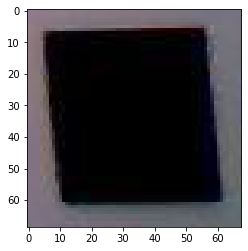

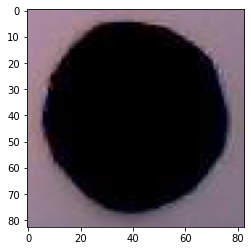

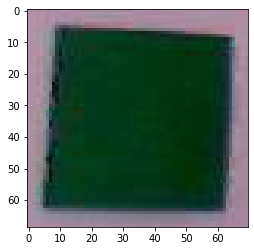

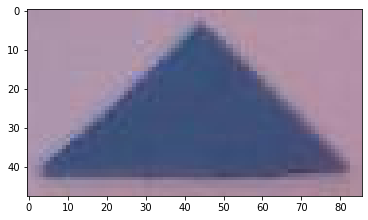

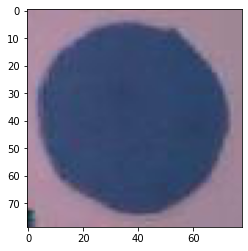

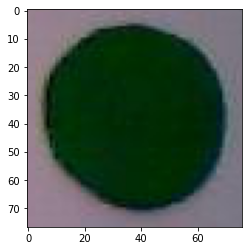

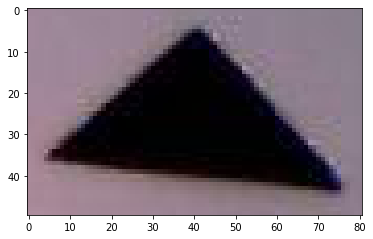

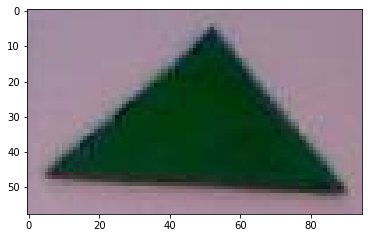

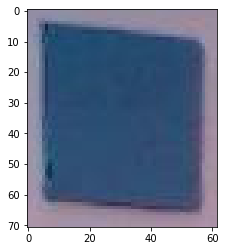

In [22]:
TS_number = 0
for c in cont:
    plt.imshow(img.imread('TS_{}.png'.format(TS_number)))
    plt.show()
    TS_number+=1